In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Baixnado e ajustando os dados

In [6]:
df = pd.read_csv("raw/desafio_manutencao_preditiva_treino.csv", index_col='udi', low_memory=False).drop(columns=['product_id'])
df['diff_temperature_k'] = df['process_temperature_k'] - df['air_temperature_k'] 

In [3]:
df.shape

(6667, 9)

In [14]:
df.head()


,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
udi,,,,,,,
1,M,298.1,308.6,1551,42.8,0,No Failure
2,L,298.2,308.7,1408,46.3,3,No Failure
5,L,298.2,308.7,1408,40.0,9,No Failure
6,M,298.1,308.6,1425,41.9,11,No Failure
7,L,298.1,308.6,1558,42.4,14,No Failure


# Realizando uma limpeza nos dados

In [54]:
df.fillna(df.mode().iloc[0])
df.dropna()
df.drop_duplicates()


,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type,diff_temperature_k
udi,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,No Failure,10.5
2,L,298.2,308.7,1408,46.3,3,No Failure,10.5
5,L,298.2,308.7,1408,40.0,9,No Failure,10.5
6,M,298.1,308.6,1425,41.9,11,No Failure,10.5
7,L,298.1,308.6,1558,42.4,14,No Failure,10.5
...,...,...,...,...,...,...,...,...
9995,L,298.8,308.3,1634,27.9,12,No Failure,9.5
9996,M,298.8,308.4,1604,29.5,14,No Failure,9.6
9997,H,298.9,308.4,1632,31.8,17,No Failure,9.5


# Observando a contagem de targets

In [16]:
df.failure_type.value_counts()

No Failure                  6435
Heat Dissipation Failure      75
Power Failure                 63
Overstrain Failure            52
Tool Wear Failure             30
Random Failures               12
Name: failure_type, dtype: int64

Temos um dataframe de classe desbalanceada.

# Observando as distribuições atraves de histgrama

## Air Temperature

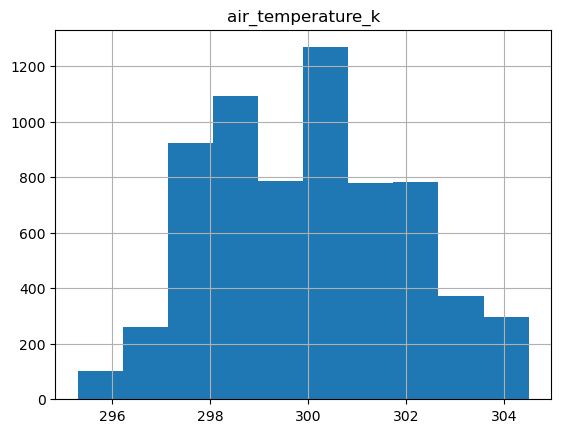

In [8]:
# create a histogram of the 'variable' column
df['air_temperature_k'].hist()

# add a title to the plot
plt.title('air_temperature_k')

# display the plot
plt.show()

## Process Temperature

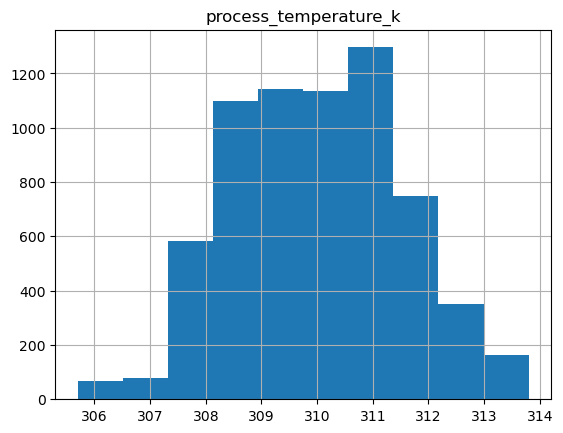

In [9]:
# create a histogram of the 'variable' column
df['process_temperature_k'].hist()

# add a title to the plot
plt.title('process_temperature_k')

# display the plot
plt.show()

## Type

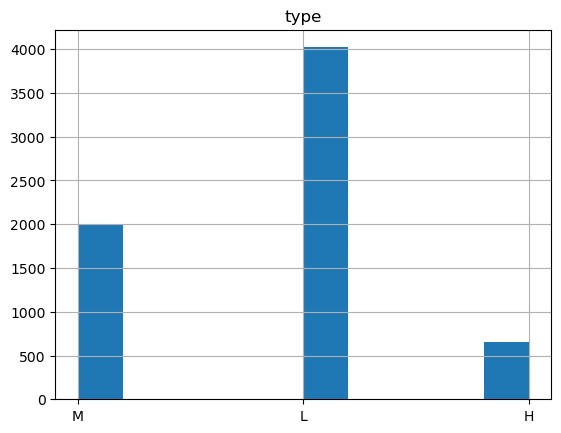

In [17]:
# create a histogram of the 'variable' column
df['type'].hist()

# add a title to the plot
plt.title('type')

# display the plot
plt.show()

## Rotational Speed

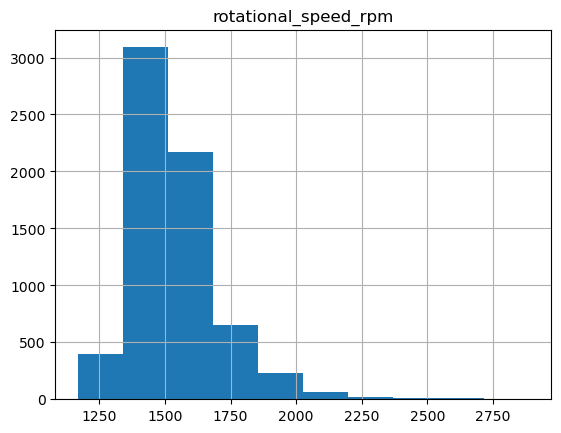

In [11]:
# create a histogram of the 'variable' column
df['rotational_speed_rpm'].hist()

# add a title to the plot
plt.title('rotational_speed_rpm')

# display the plot
plt.show()

## Torque

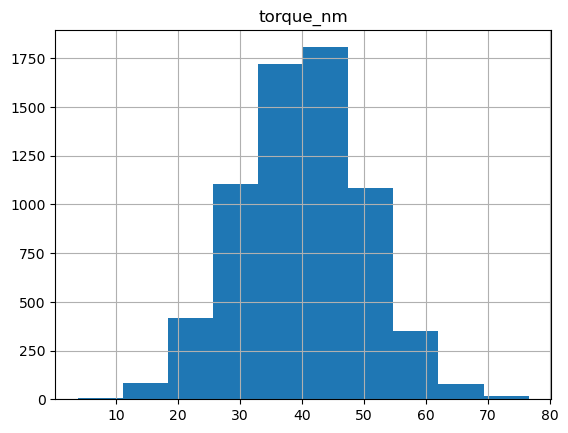

In [12]:

# create a histogram of the 'variable' column
df['torque_nm'].hist()

# add a title to the plot
plt.title('torque_nm')

# display the plot
plt.show()

## Tool Wear

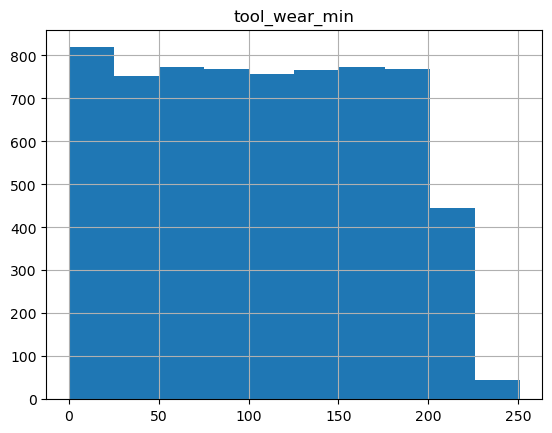

In [13]:

# create a histogram of the 'variable' column
df['tool_wear_min'].hist()

# add a title to the plot
plt.title('tool_wear_min')

# display the plot
plt.show()


## Matrizes de Correlação

/var/folders/5q/tntm05wn72jfskznn7wqdbgh0000gn/T/ipykernel_20362/941349398.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


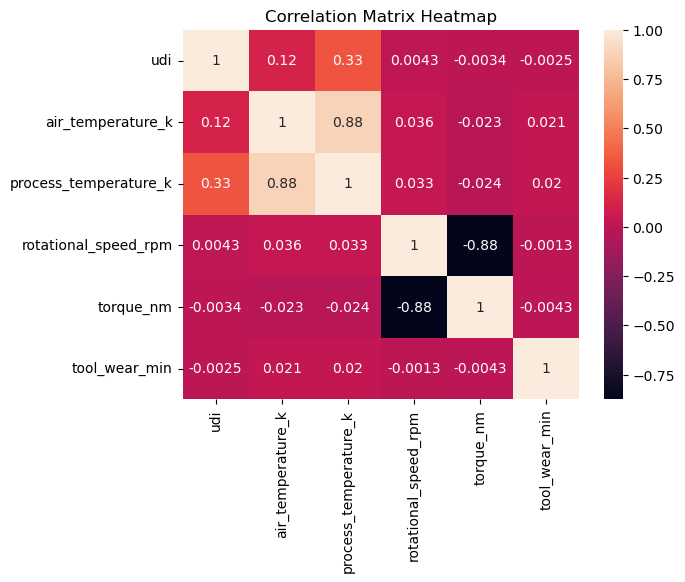

In [23]:
# calculate the correlation matrix
correlation_matrix = df.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True)

# add a title to the plot
plt.title('Correlation Matrix Heatmap')

# display the plot
plt.show()

Observamos uma alta correlação positiva entre as variáveis de medição da temepratura e uma alta correlação negativa entre torque e rotational speed.

## Nova variável. Diferença de temperatura

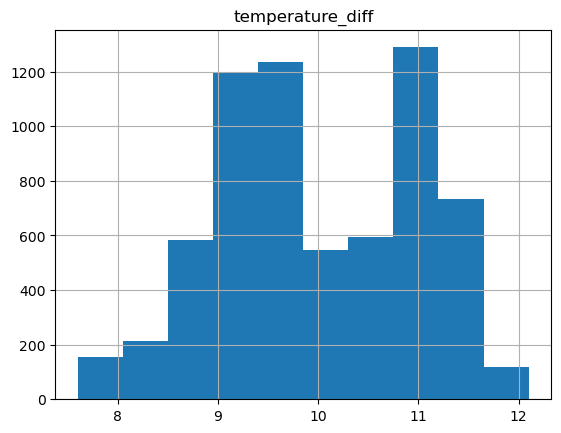

In [29]:
# create a histogram of the 'variable' column
df['temperature_diff'].hist()

# add a title to the plot
plt.title('temperature_diff')

# display the plot
plt.show()

## Correlações com a diferença de temepratura e com a falha

/var/folders/5q/tntm05wn72jfskznn7wqdbgh0000gn/T/ipykernel_20362/941349398.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


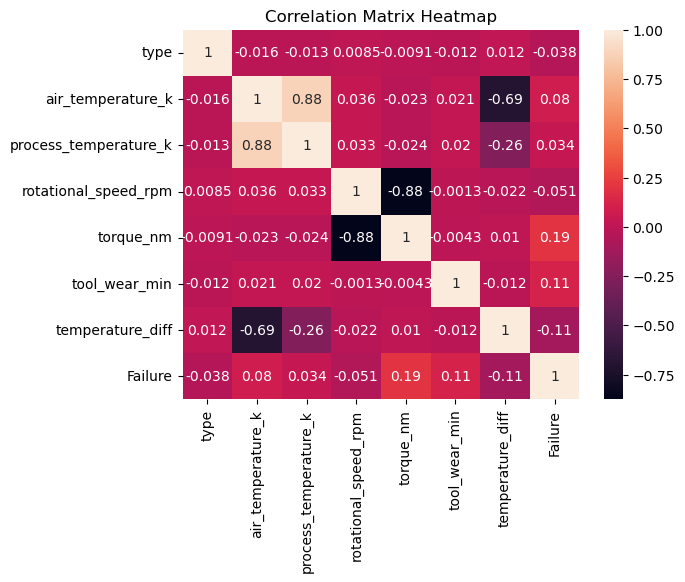

In [44]:
# calculate the correlation matrix
correlation_matrix = df.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True)

# add a title to the plot
plt.title('Correlation Matrix Heatmap')

# display the plot
plt.show()

Observando os outliers para rotational speed e process temperature

# Avaliando extremos da temperatura

In [64]:
# calculate the Z-Score of each value in 'pråocess_temperature_k'
z_score = (df['process_temperature_k'] - df['process_temperature_k'].mean()) / df['process_temperature_k'].std()

# set a threshold for outliers
threshold = 2.3
# select only the rows where the Z-Score of 'column1' is greater than the threshold
outliers = df[np.abs(z_score) > threshold]

outliers.failure_type.value_counts()

No Failure            92
Power Failure          2
Overstrain Failure     1
Name: failure_type, dtype: int64

In [67]:
# calculate the Z-Score of each value in 'air_temperature_k'
z_score = (df['air_temperature_k'] - df['air_temperature_k'].mean()) / df['air_temperature_k'].std()

# set a threshold for outliers
threshold = 2
# select only the rows where the Z-Score of 'column1' is greater than the threshold
outliers = df[np.abs(z_score) > threshold]

outliers.failure_type.value_counts()

No Failure            172
Power Failure           2
Overstrain Failure      2
Name: failure_type, dtype: int64

df = df.drop(columns=['process_temperature_k'])
df = df.drop(columns=['air_temperature_k'])

Nos extremos da variável air temperature e process temeprature temos uma baixa aparição de falhas.

# Avaliando os extremos do Rotational Speed

In [60]:
# calculate the Z-Score of each value in 'rotational_speed_rpm'
z_score = (df['rotational_speed_rpm'] - df['rotational_speed_rpm'].mean()) / df['rotational_speed_rpm'].std()

# set a threshold for outliers
threshold = 3

# select only the rows where the Z-Score of 'column1' is greater than the threshold
outliers = df[np.abs(z_score) > threshold]

outliers.failure_type.value_counts()

No Failure           85
Power Failure        18
Tool Wear Failure     2
Name: failure_type, dtype: int64

No extremo de Rotational Speen temos uma alta aparição de falhas.

/var/folders/5q/tntm05wn72jfskznn7wqdbgh0000gn/T/ipykernel_20362/3632847050.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = outliers.corr()


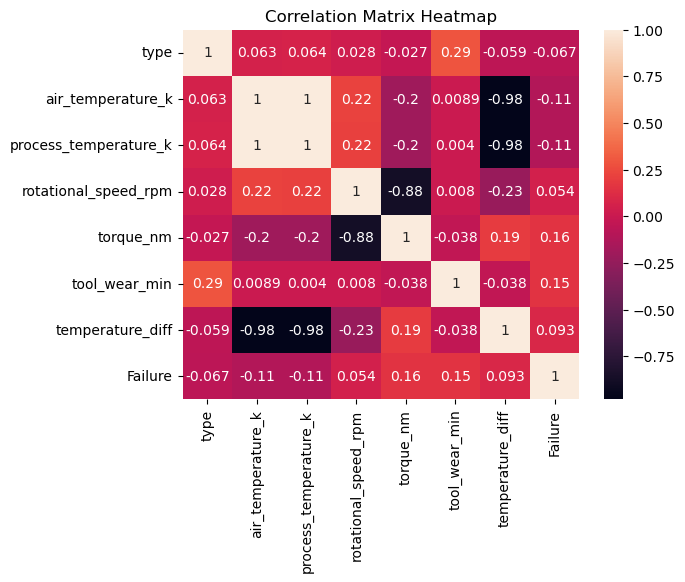

In [65]:
# calculate the correlation matrix
correlation_matrix = outliers.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True)

# add a title to the plot
plt.title('Correlation Matrix Heatmap')

# display the plot
plt.show()

# Avaliando os extremos do TORQUE

In [70]:
# calculate the Z-Score of each value in 'torque_nm'
z_score = (df['torque_nm'] - df['torque_nm'].mean()) / df['torque_nm'].std()

# set a threshold for outliers
threshold = 3
# select only the rows where the Z-Score of 'column1' is greater than the threshold
outliers = df[np.abs(z_score) > threshold]


outliers.failure_type.value_counts()

Power Failure    19
Name: failure_type, dtype: int64

/var/folders/5q/tntm05wn72jfskznn7wqdbgh0000gn/T/ipykernel_20362/3632847050.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = outliers.corr()


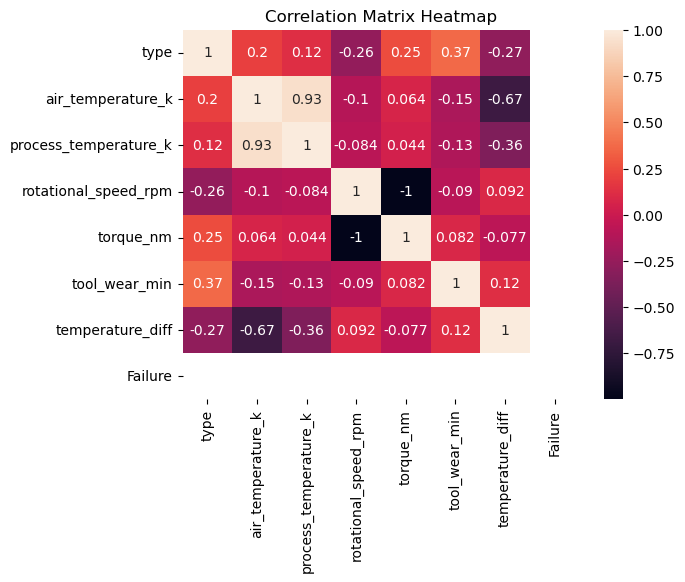

In [71]:
# calculate the correlation matrix
correlation_matrix = outliers.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True)

# add a title to the plot
plt.title('Correlation Matrix Heatmap')

# display the plot
plt.show()

# Observando as características estatísticas

In [73]:
df.describe()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,temperature_diff,Failure
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,0.495425,299.992515,309.992620,1537.419529,40.058512,108.098095,10.000105,0.032998
std,0.668907,1.994710,1.488101,177.182908,9.950804,63.359915,0.997216,0.178646
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,7.600000,0.000000
25%,0.000000,298.300000,308.800000,1422.500000,33.200000,54.000000,9.300000,0.000000
50%,0.000000,300.000000,310.000000,1503.000000,40.200000,108.000000,9.800000,0.000000
75%,1.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,11.000000,0.000000
max,2.000000,304.500000,313.800000,2886.000000,76.600000,251.000000,12.100000,1.000000


In [6]:
df

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


# Observando boxplots das variáveis de temperatura por tipos de erro

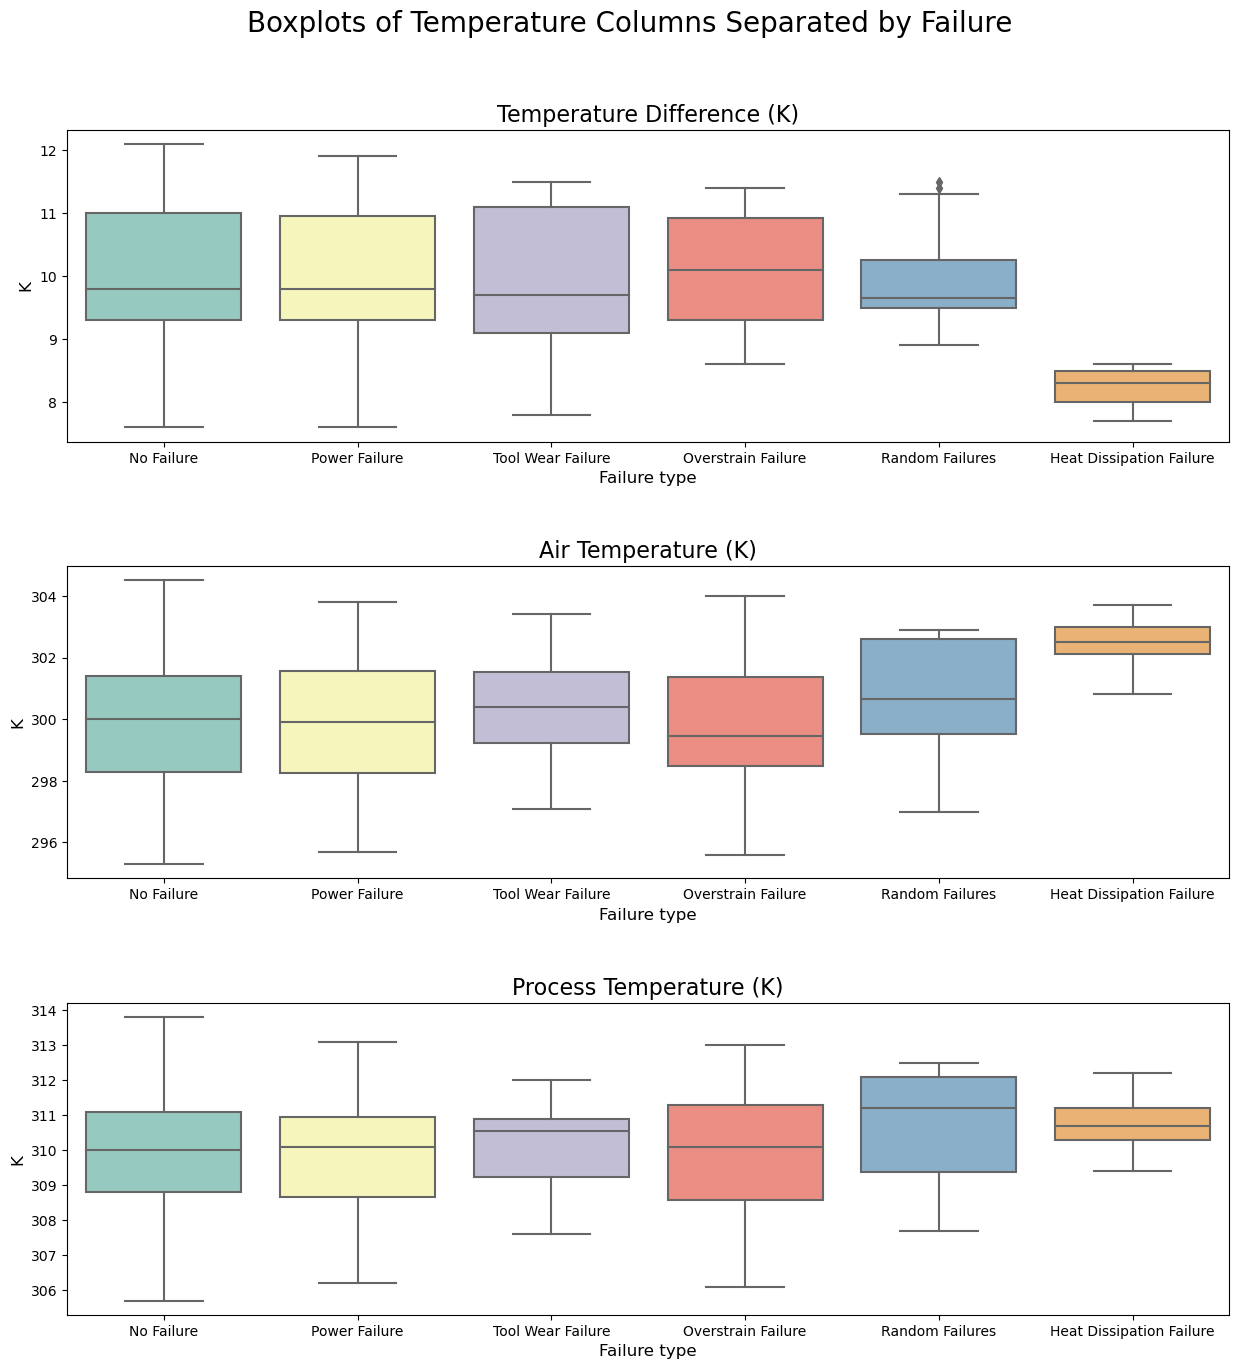

In [61]:
# Set the figure and axis
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
axs = axs.ravel()

# Plot the boxplots for each column in a separate subplot
cols = ['diff_temperature_k','air_temperature_k', 'process_temperature_k']
col_titles = {'diff_temperature_k': 'Temperature Difference (K)', 
              'air_temperature_k': 'Air Temperature (K)',
              'process_temperature_k': 'Process Temperature (K)',
              }
units = ['K', 'K', 'K']
for i, col in enumerate(cols):
    sns.boxplot(x='failure_type', y=col, data=df, ax=axs[i], palette='Set3')
    axs[i].set_title(col_titles[col], fontsize=16)
    axs[i].set_ylabel(units[i], fontsize=12)
    axs[i].set_xlabel('Failure type', fontsize=12)

# Adjust the space between subplots
fig.subplots_adjust(hspace=0.4, top=0.9)

# Add a title to the figure
fig.suptitle("Boxplots of Temperature Columns Separated by Failure", fontsize=20)

# Show the plot
plt.show()

Podemos observar que na variável temperature Diff, o Heat Dissipation Failure tem uma distribuição mais ao extremos do que ao observar os outros tipso de temepratura. Podemos observar tbm que o Random Failure está dentro da distibuição do No failure em todos os gráficos;

# Observando boxplots para as outras variáveis por tipos de erro

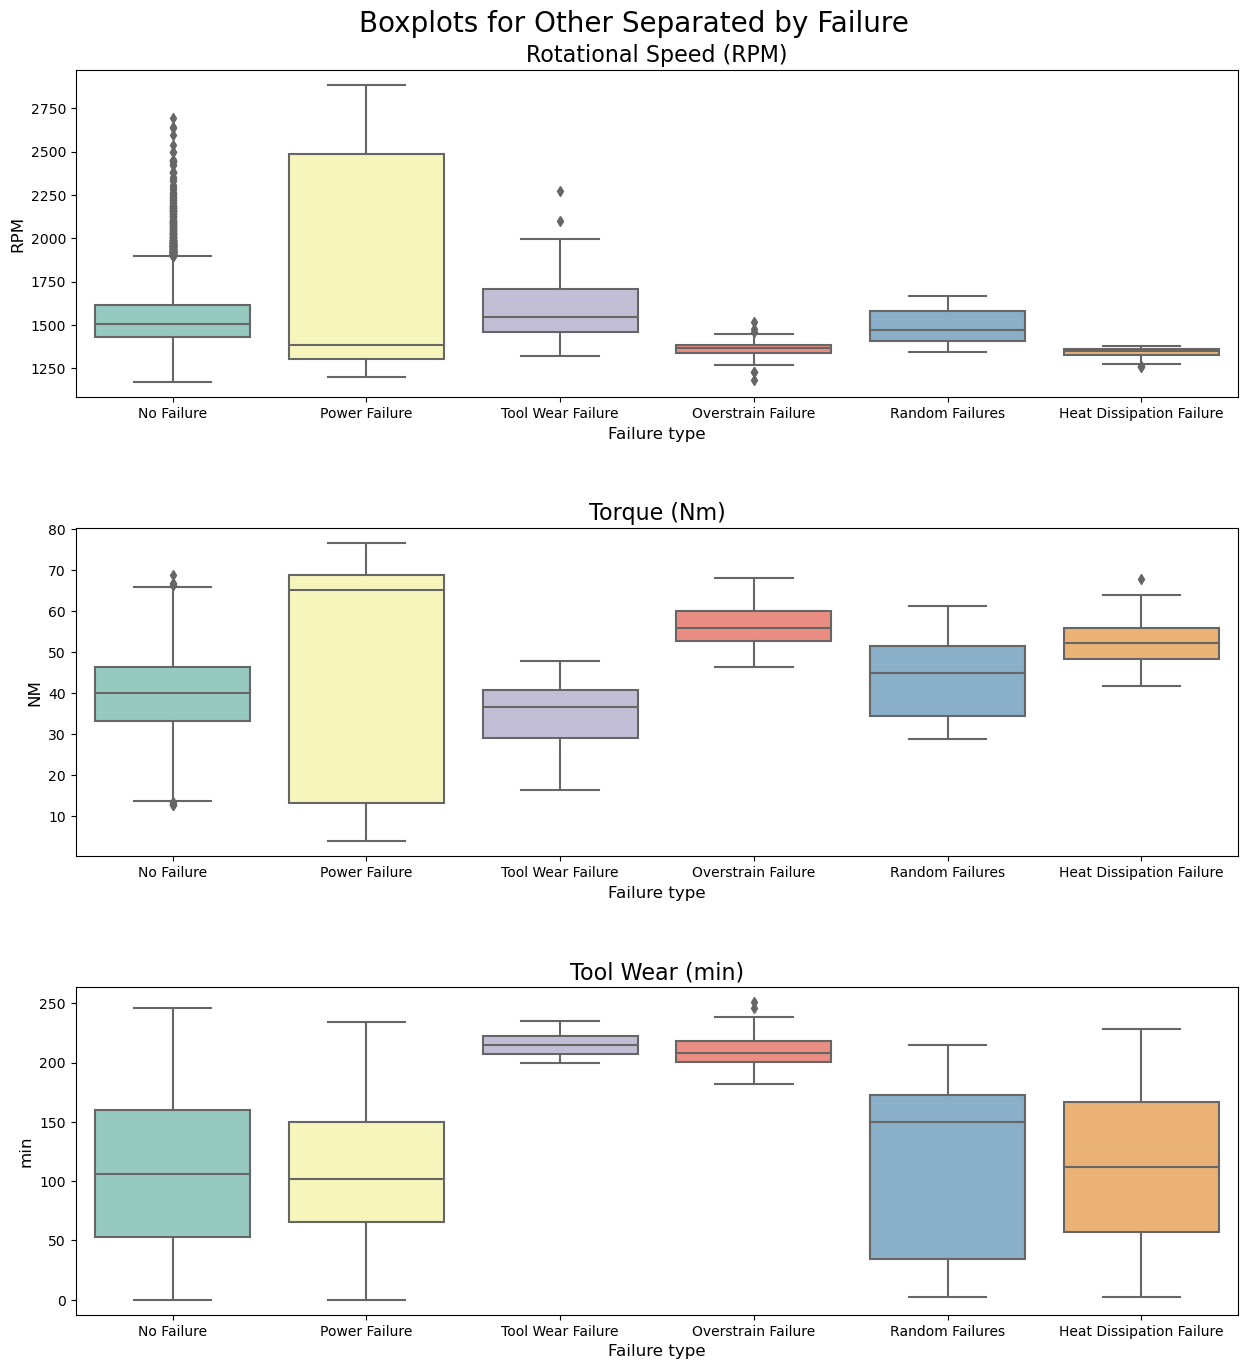

In [65]:
# Set the figure and axis
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
axs = axs.ravel()

# Plot the boxplots for each column in a separate subplot
cols = ['rotational_speed_rpm', 'torque_nm', 'tool_wear_min']
col_titles = {'rotational_speed_rpm': 'Rotational Speed (RPM)',
              'torque_nm': 'Torque (Nm)',
              'tool_wear_min': 'Tool Wear (min)'}
units = ['RPM', 'NM', 'min']
for i, col in enumerate(cols):
    sns.boxplot(x='failure_type', y=col, data=df, ax=axs[i], palette='Set3')
    axs[i].set_title(col_titles[col], fontsize=16)
    axs[i].set_ylabel(units[i], fontsize=12)
    axs[i].set_xlabel('Failure type', fontsize=12)

# Adjust the space between subplots
fig.subplots_adjust(hspace=0.4, top=0.94)

# Add a title to the figure
fig.suptitle("Boxplots for Other Separated by Failure ", fontsize=20)

# Show the plot
plt.show()

Podemos observar que o erro Tool Wear e o Overstrain tem distribuição diferente em relação ao No Failure para os três tipos de variáveis nos gráficos acima. Podemos observar tbm que o Random Failure está dentro da distibuição do No failure em todos os gráficos;

# Decisção

Devido aos achados acima decidi dropar as colunas 'air_temperature_k' e 'process_temperature_k'. também decidi substituir os 'Random Failure' por 'No Failure' na variável failure_type

In [7]:
df = df.drop(['air_temperature_k', 'process_temperature_k'], axis=1)
df['failure_type'] = df['failure_type'].replace('Random Failures', 'No Failure')


In [8]:
df

,type,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type,diff_temperature_k
udi,,,,,,
1,M,1551,42.8,0,No Failure,10.5
2,L,1408,46.3,3,No Failure,10.5
5,L,1408,40.0,9,No Failure,10.5
6,M,1425,41.9,11,No Failure,10.5
7,L,1558,42.4,14,No Failure,10.5
...,...,...,...,...,...,...
9995,L,1634,27.9,12,No Failure,9.5
9996,M,1604,29.5,14,No Failure,9.6
9997,H,1632,31.8,17,No Failure,9.5


In [9]:
df.to_csv('../processed/processed_df.csv', index=True)


In [2]:
df = pd.read_csv("raw/desafio_manutencao_preditiva_teste.csv", index_col='udi', low_memory=False).drop(columns=['product_id'])
df['diff_temperature_k'] = df['process_temperature_k'] - df['air_temperature_k'] 
df = df.drop(['air_temperature_k', 'process_temperature_k'], axis=1)

In [3]:
df.fillna(df.mode().iloc[0])
df.dropna()
df.drop_duplicates()

,type,rotational_speed_rpm,torque_nm,tool_wear_min,diff_temperature_k
udi,,,,,
446,L,1793,26.7,70,11.1
7076,L,1536,47.4,192,9.8
1191,L,1460,42.1,41,11.2
2618,L,1670,35.9,68,9.7
5067,L,1550,30.9,9,9.0
...,...,...,...,...,...
5554,L,1306,59.7,172,9.4
6961,L,1413,52.0,91,10.3
6914,L,1481,38.5,181,10.4


In [5]:
df.to_csv('processed/processed_teste.csv', index=True)